In [1]:
# import warnings

# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os

import json
import datetime as dt
from ftplib import FTP_TLS
import tkinter as tk
from tkinter import messagebox
import csv
from openpyxl import load_workbook

root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)  # ✅ Hace que los messagebox estén en primer plano


''

In [2]:
s_path=Path.cwd()
s_prt_path=s_path.parent

objetoAPI = pydataxm.ReadDB()    

df =objetoAPI.get_collections()

# Get main path and other folders
s_mainpath=Path.cwd()
sRutaPrint=s_mainpath.joinpath('Print')

### Datos de Sinergox

In [3]:
FechaIni=dt.date(2025,10,1)
FechaFin=FechaIni

In [4]:
df_RecIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

# Units kWh, Descarga de la disponibilidad real
df_DispDecIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DispoDeclarada",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

# Units kWh, Descarga de la disponibilidad real
df_CENIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "CapEfecNeta",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

df_DemRealIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DemaReal",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

df_PBIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "PrecBolsNaci",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [24]:
df_RecIni

,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ISGG,AGUA,2014-03-31,OPERACION,2025-09-30
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2025-09-30
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION,2025-09-30
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2025-09-30
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2025-09-30
...,...,...,...,...,...,...,...,...,...,...,...
1234,Sistema,VNTB,VENTANA B,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HDTG,AGUA,1957-11-01,OPERACION,2025-09-30
1235,Sistema,ZPA2,ZIPAEMG 2,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1964-01-01,OPERACION,2025-09-30
1236,Sistema,ZPA3,ZIPAEMG 3,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1976-01-01,OPERACION,2025-09-30
1237,Sistema,ZPA4,ZIPAEMG 4,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1981-04-01,OPERACION,2025-09-30


In [25]:
df_DemRealIni.to_csv('Demanda.csv')

In [9]:
df_CEN

,Id,Code,Value,Date
0,Recurso,2QBW,19900.0,2025-10-01
1,Recurso,2QEK,35000.0,2025-10-01
2,Recurso,2QRL,700.0,2025-10-01
3,Recurso,2QV2,19900.0,2025-10-01
4,Recurso,2R22,18000.0,2025-10-01
...,...,...,...,...
1100,Recurso,VNTB,2500.0,2025-10-01
1101,Recurso,ZPA2,36000.0,2025-10-01
1102,Recurso,ZPA3,63000.0,2025-10-01
1103,Recurso,ZPA4,64000.0,2025-10-01


In [26]:
df_CEN=df_CENIni.copy()
df_CEN['Value']=df_CEN['Value']/1000000
df_CEN.rename(columns={'Value': 'CEN'}, inplace=True)
df_CEN.drop(columns=['Date'], inplace=True)
df_CEN = df_CEN.drop_duplicates(subset='Code', keep='first')

df_Rec=df_RecIni.copy()

df_CEN=df_CEN.merge(df_Rec,left_on=['Code'],right_on=['Values_Code'], how='left')[['Values_Name','Values_Type','Values_Disp','Values_RecType','Values_EnerSource','CEN']]

df_CEN_Carbon=df_CEN[(df_CEN.Values_Type=='TERMICA') & (df_CEN.Values_Disp=='DESPACHADO CENTRALMENTE') & (df_CEN['Values_EnerSource'].isin(['CARBON']))]
df_CEN_Carbon=df_CEN_Carbon.groupby(['Values_Type'])['CEN'].sum()
df_CEN_Carbon = df_CEN_Carbon * 24

df_CEN_Gas=df_CEN[(df_CEN.Values_Type=='TERMICA') & (df_CEN.Values_Disp=='DESPACHADO CENTRALMENTE') & (df_CEN['Values_EnerSource'].isin(['GAS']))]
df_CEN_Gas=df_CEN_Gas.groupby(['Values_Type'])['CEN'].sum()
df_CEN_Gas = df_CEN_Gas * 24

df_CEN_Liq=df_CEN[(df_CEN.Values_Type=='TERMICA') & (df_CEN.Values_Disp=='DESPACHADO CENTRALMENTE') & (~df_CEN['Values_EnerSource'].isin(['CARBON','GAS']))]
df_CEN_Liq=df_CEN_Liq.groupby(['Values_Type'])['CEN'].sum()
df_CEN_Liq = df_CEN_Liq * 24

In [25]:
df_CEN_Carbon

Values_Type
TERMICA    38.712
Name: CEN, dtype: float64

In [27]:
df_CEN_Gas

Values_Type
TERMICA    71.592
Name: CEN, dtype: float64

In [28]:
df_CEN_Liq

Values_Type
TERMICA    28.56
Name: CEN, dtype: float64

In [13]:
df_CEN.to_csv('CENREcursos.csv')

In [5]:
df_CEN=df_CENIni.copy()
df_Rec=df_RecIni.copy()
df_DispDec=df_DispDecIni.copy()
df_DemReal=df_DemRealIni.copy()
df_PB=df_PBIni.copy()

# df_CEN.fillna(0, inplace=True)
df_CEN['Value']=df_CEN['Value']/1000
df_CEN.rename(columns={'Value': 'CEN'}, inplace=True)
df_CEN.drop(columns=['Date'], inplace=True)
df_CEN = df_CEN.drop_duplicates(subset='Code', keep='first')
# df_CEN=df_CEN[df_CEN.Date=='2024-09-01']
df_DispDec.fillna(0, inplace=True)

if 'Date' in df_Rec.columns:
    df_Rec=df_Rec.drop('Date',axis=1)

# if 'Date' in df_CEN.columns:
#     df_CEN=df_CEN.drop('Date',axis=1)

l_per=[]
for i in range(1,25):
    if i<10:
        df_DispDec=df_DispDec.rename(columns={'Values_Hour0' + str(i) : str(i) })
        df_DemReal=df_DemReal.rename(columns={'Values_Hour0' + str(i) : str(i) })
        df_PB=df_PB.rename(columns={'Values_Hour0' + str(i) : str(i) })
    else:
        df_DispDec=df_DispDec.rename(columns={'Values_Hour' + str(i) : str(i) })
        df_DemReal=df_DemReal.rename(columns={'Values_Hour' + str(i) : str(i) })
        df_PB=df_PB.rename(columns={'Values_Hour' + str(i) : str(i) })

    df_DispDec[str(i)]=df_DispDec[str(i)]/1000
    df_DemReal[str(i)]=df_DemReal[str(i)]/1000
    l_per.append(str(i))

In [ ]:
l_col=['Date','Values_code','Values_Name', 'Values_Type','Values_EnerSource', 'Values_Disp','Values_RecType', 'Values_State'] + l_per

df_Disp_Rec=df_DispDec.merge(df_Rec,left_on=['Values_code'],right_on=['Values_Code'], how='left')[l_col]

l_col.append('CEN')
df_DispRec_CEN=df_Disp_Rec.merge(df_CEN,left_on=['Values_code'],right_on=['Code'], how='left')[l_col]
df_DispRec_CEN['CEN'] = df_DispRec_CEN['CEN'].fillna(df_DispRec_CEN[l_per].max(axis=1))
# df_DispRec_CEN.to_csv('CEN.csv')

df_DispRec_CEN

,Date,Values_code,Values_Name,Values_Type,Values_EnerSource,Values_Disp,Values_RecType,Values_State,1,2,...,16,17,18,19,20,21,22,23,24,CEN
0,2025-08-28,2QBW,EL POPAL,HIDRAULICA,AGUA,NO DESPACHADO CENTRALMENTE,NORMAL,OPERACION,19.24,19.24,...,19.24,19.24,19.24,19.24,19.24,19.24,19.24,19.24,19.24,19.9
1,2025-08-28,2QEK,SALTO II,HIDRAULICA,AGUA,DESPACHADO CENTRALMENTE,FILO DE AGUA,OPERACION,35.00,35.00,...,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.0
2,2025-08-28,2QRL,LA REBUSCA,HIDRAULICA,AGUA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,OPERACION,0.65,0.65,...,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.7
3,2025-08-28,2QV2,BAJO TULUA,HIDRAULICA,AGUA,NO DESPACHADO CENTRALMENTE,NORMAL,OPERACION,10.00,10.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,19.9
4,2025-08-28,2R22,LAGUNETA,HIDRAULICA,AGUA,NO DESPACHADO CENTRALMENTE,NORMAL,OPERACION,18.00,18.00,...,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2025-08-28,VNTB,VENTANA B,HIDRAULICA,AGUA,NO DESPACHADO CENTRALMENTE,NORMAL,OPERACION,2.50,2.50,...,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.5
397,2025-08-28,ZPA2,ZIPAEMG 2,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,36.00,36.00,...,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.0
398,2025-08-28,ZPA3,ZIPAEMG 3,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,63.00,63.00,...,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.0
399,2025-08-28,ZPA4,ZIPAEMG 4,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,64.00,64.00,...,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.0


In [ ]:
df_Total=df_DispRec_CEN.groupby(['Date'])[l_per].sum().round(2).reset_index()
# df_DispDec.to_csv('Disponibliad.csv')
df_Total

,Date,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2025-08-28,15339.07,15339.06,15337.43,15339.44,15339.38,15346.6,15658.15,16323.26,16864.05,...,16537.74,16359.71,15952.56,15711.4,15617.88,15614.99,15614.71,15522.83,15574.09,15810.72


In [ ]:
# Renovable no despachada centralmente
df_NDC_Rv=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['SOLAR','EOLICA'])) & (df_DispRec_CEN['Values_Disp']=='NO DESPACHADO CENTRALMENTE')]
df_NDC_Rv_d=df_NDC_Rv.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_NDC_Rv_d['Tipo']='FERNC NDC'
df_NDC_Rv_c=df_NDC_Rv.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_NDC_Rv_c['Tipo']='FERNC NDC'

df_data=df_NDC_Rv_d.copy()
df_data_c=df_NDC_Rv_c.copy()
# No renovable despachada centralmente
df_NDC_NoRv=df_DispRec_CEN[(~df_DispRec_CEN['Values_Type'].isin(['SOLAR','EOLICA'])) & (df_DispRec_CEN['Values_Disp']=='NO DESPACHADO CENTRALMENTE')]
df_NDC_NoRv_d=df_NDC_NoRv.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_NDC_NoRv_d['Tipo']='NDC'
df_NDC_NoRv_c=df_NDC_NoRv.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_NDC_NoRv_c['Tipo']='NDC'

df_data=pd.concat([df_data,df_NDC_NoRv_d],axis=0)
df_data_c=pd.concat([df_data_c,df_NDC_NoRv_c],axis=0)

# Térmica despachada centralmente
df_Ren=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['SOLAR','EOLICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Ren_d=df_Ren.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Ren_d['Tipo']='FERNC DC'
df_Ren_c=df_Ren.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Ren_c['Tipo']='FERNC DC'

df_data=pd.concat([df_data,df_Ren_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Ren_c],axis=0)

# Hidráulica despachada centralmente
df_Hidro=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['HIDRAULICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Hidro_d=df_Hidro.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Hidro_d['Tipo']='Hidro DC'
df_Hidro_c=df_Hidro.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Hidro_c['Tipo']='Hidro DC'

df_data=pd.concat([df_data,df_Hidro_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Hidro_c],axis=0)

# Térmica despachada centralmente
df_Ter=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['TERMICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Ter_d=df_Ter.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Ter_d['Tipo']='Térmica DC'
df_Ter_c=df_Ter.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Ter_c['Tipo']='Térmica DC'

df_data=pd.concat([df_data,df_Ter_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Ter_c],axis=0)



In [ ]:
lcol=list(df_data.columns)
lcol.append('CEN')
df_data_t=df_data.merge(df_data_c,left_on=['Date','Tipo'], right_on=['Date','Tipo'], how='inner')[lcol]
df_data_t

,Date,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Tipo,CEN
0,2025-08-28,0.00,0.00,0.00,0.00,0.00,4.26,94.30,303.29,473.49,...,223.49,83.15,29.33,24.25,23.10,20.29,20.17,21.18,FERNC NDC,730.20
1,2025-08-28,854.47,854.46,852.83,852.84,852.78,855.74,851.25,853.37,847.96,...,838.47,838.65,847.95,850.14,851.01,851.94,852.32,851.94,NDC,1385.49
2,2025-08-28,0.00,0.00,0.00,0.00,0.00,0.00,136.00,590.00,966.00,...,390.00,124.00,0.00,0.00,0.00,0.00,0.00,0.00,FERNC DC,1277.00
3,2025-08-28,9398.60,9398.60,9398.60,9400.60,9400.60,9400.60,9490.60,9490.60,9490.60,...,9398.60,9563.60,9637.60,9637.60,9637.60,9547.60,9598.60,9834.60,Hidro DC,12237.00
4,2025-08-28,5086.00,5086.00,5086.00,5086.00,5086.00,5086.00,5086.00,5086.00,5086.00,...,5102.00,5102.00,5103.00,5103.00,5103.00,5103.00,5103.00,5103.00,Térmica DC,5803.00


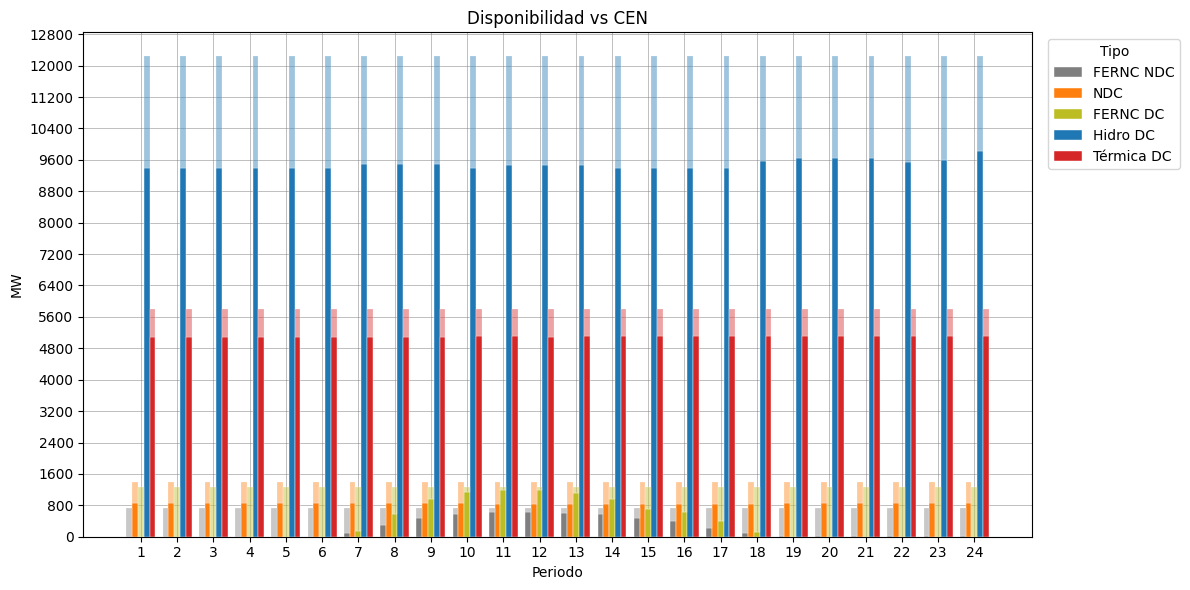

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

def lighten(color, amount=0.75):
    r,g,b = to_rgb(color)
    return (1-amount) + amount*np.array([r,g,b])

fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(1,25)
tipos = list(df_data_t['Tipo'])
n_tipos = max(1, len(tipos))
bar_width = 0.8 / n_tipos

color_map = {
    'NDC':        '#ff7f0e',
    'FERNC DC':   '#bcbd22',
    'Hidro DC':   '#1f77b4',
    'Térmica DC': '#d62728',
}
default_color = '#7f7f7f'

handles_tipos = []

for i, (_, row) in enumerate(df_data_t.iterrows()):
    tipo = str(row['Tipo'])
    c_dark  = color_map.get(tipo, default_color)
    c_light = lighten(c_dark, amount=0.85)

    # Valor por periodo (24)
    y_vals = np.asarray(row[l_per], dtype=float)

    # --- CEN por periodo (SIN dividir por 24) ---
    cen_raw = row['CEN']               # puede ser escalar (mismo valor cada periodo) o vector de 24
    if np.isscalar(cen_raw):
        y_cen = np.full(24, float(cen_raw))   # mismo CEN en todos los periodos
    else:
        y_cen = np.asarray(cen_raw, dtype=float)  # ya viene por periodo

    # Complemento (CEN - Valor)
    y_comp = y_cen - y_vals
    # Si NO quieres negativos apilando hacia abajo, descomenta la siguiente línea:
    # y_comp = np.clip(y_comp, 0, None)

    pos = x - 0.4 + i*bar_width + bar_width/2

    # Segmento base (oscuro)
    bars_dark = ax.bar(pos, y_vals, width=bar_width,
                       color=c_dark, edgecolor='white', linewidth=0.3, zorder=2)

    # Complemento (mismo color, más claro)
    ax.bar(pos, y_comp, width=bar_width, bottom=y_vals,
           color=c_light, edgecolor='white', linewidth=0.3, zorder=3, alpha=0.5)

    handles_tipos.append(bars_dark[0])

ax.set_xlabel('Periodo'); ax.set_ylabel('MW')
ax.set_title('Disponibilidad vs CEN')
ax.set_xticks(x); ax.set_xticklabels(x)
ax.grid(axis='y', linestyle=':', alpha=0.6, zorder=1)

# Ajustar particiones en el eje Y
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=20))  # Máximo de 10 particiones

# Mostrar líneas de cuadrícula para particiones principales y menores
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)  # Líneas principales
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.5)  # Líneas menores

# Mostrar números en el eje Y
ax.tick_params(axis='y', which='both', labelsize=10)

ax.legend(handles_tipos, [str(t) for t in tipos], title='Tipo',
          loc='upper left', bbox_to_anchor=(1.01, 1.0))
plt.tight_layout()
plt.show()


In [ ]:
df_PB

,Id,Values_code,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,Date
0,Sistema,Sistema,353.75881,353.75881,343.75881,343.75881,353.75881,353.75881,353.75881,353.75881,...,393.75881,398.75881,398.75881,527.68881,2218.50581,503.75881,398.75881,353.75881,353.75881,2025-08-28


In [ ]:
y_pb=pd.to_numeric(df_PB.iloc[0,2:26], errors='coerce').to_numpy(dtype=float)
y_pb

array([ 353.75881,  353.75881,  343.75881,  343.75881,  353.75881,
        353.75881,  353.75881,  353.75881,  353.75881,  353.75881,
        353.75881,  353.75881,  353.75881,  353.75881,  393.75881,
        393.75881,  398.75881,  398.75881,  527.68881, 2218.50581,
        503.75881,  398.75881,  353.75881,  353.75881])

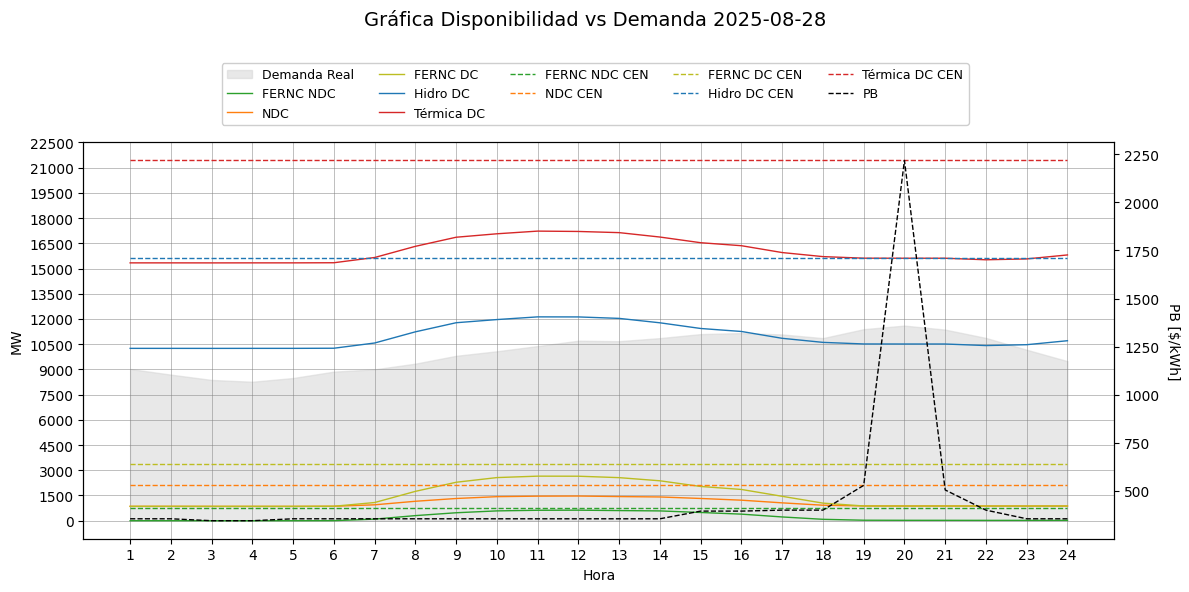

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Eje X (1..24)
x = np.arange(1, 25, dtype=float)

# --- Demanda real (eje izquierdo) ---
y_demreal = pd.to_numeric(df_DemReal.iloc[0, 2:26], errors='coerce').to_numpy(dtype=float)
if np.isnan(y_demreal).any():
    y_demreal = pd.Series(y_demreal).interpolate(limit_direction='both').to_numpy()

ax.fill_between(x, y_demreal, 0, color='lightgray', alpha=0.5, label='Demanda Real')

# Paleta por tipo (ajústala a tus nombres reales)
color_map = {
    'FERNC NDC': '#2ca02c',  
    'NDC':       '#ff7f0e',  
    'FERNC DC':  '#bcbd22',  
    'Hidro DC':  '#1f77b4',  
    'Térmica DC':'#d62728', 
    # cualquier otro tipo...
}

default_color = '#7f7f7f'     # para tipos no mapeados

# --- Líneas apiladas (eje izquierdo) ---
y_stack = np.zeros_like(y_demreal, dtype=float)
for _, row in df_data.iterrows():
    tipo = str(row['Tipo'])
    y_values = pd.to_numeric(row.iloc[1:25], errors='coerce').to_numpy(dtype=float)
    if np.isnan(y_values).any():
        y_values = pd.Series(y_values).interpolate(limit_direction='both').to_numpy()
    ax.plot(
        x, y_stack + y_values,
        label=tipo,
        color=color_map.get(tipo, default_color),
        linewidth=1
    )
    y_stack += y_values

# --- Líneas apiladas (eje izquierdo) ---
y_stack = np.zeros_like(y_demreal, dtype=float)
for _, row in df_data_c.iterrows():
    tipo = str(row['Tipo'])
    y_values = row['CEN']
    ax.plot(
        x, y_stack + y_values,
        label=tipo + ' CEN',
        color=color_map.get(tipo, default_color),
        linewidth=1,
        linestyle='--'
    )
    y_stack += y_values

# --- Eje secundario con df_PB (1..24) ---
ax2 = ax.twinx()

# # Intento robusto para obtener las 24 horas de df_PB (primera fila)
# candidatos = [
#     df_PB.iloc[0, 1:25],           # si hay 1 columna meta
#     df_PB.iloc[0, 2:26],           # si hay 2 columnas meta
#     df_PB.iloc[0, 0:24],           # si empiezan desde la columna 0
#     df_PB.filter(regex=r'^(?:[1-9]|1[0-9]|2[0-4])$').iloc[0]  # si las columnas se llaman "1".."24"
# ]
# y_pb = None
# for s in candidatos:
#     if s.shape[0] == 24:
#         y_pb = pd.to_numeric(s, errors='coerce').to_numpy(dtype=float)
#         break
# if y_pb is None:
#     raise ValueError("No se encontraron 24 columnas consecutivas (1..24) en df_PB para la primera fila.")

# # Interpola si hay NaN
# if np.isnan(y_pb).any():
#     y_pb = pd.Series(y_pb).interpolate(limit_direction='both').to_numpy()

y_pb=pd.to_numeric(df_PB.iloc[0,2:26], errors='coerce').to_numpy(dtype=float)

# Trazo en eje secundario
ax2.plot(x, y_pb, linewidth=1, linestyle='--',color='black', label='PB')

# --- Estética y leyenda combinada ---
ax.set_xlabel('Hora')
ax.set_ylabel('MW')
ax.grid(True)

# Ajustar particiones en el eje Y
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=20))  # Máximo de 10 particiones

# Mostrar líneas de cuadrícula para particiones principales y menores
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)  # Líneas principales
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.5)  # Líneas menores

# Mostrar números en el eje Y
ax.tick_params(axis='y', which='both', labelsize=10)


# --- LEYENDA CENTRADA DEBAJO DEL TÍTULO (sin montarse) ---

# --- Título y leyenda limpias ---

# 1) Quita título del eje si lo tenías:
# try: ax.set_title('')  # o simplemente no lo llames
# except: pass

# 2) Título a nivel de figura
fig.suptitle(rf'Gráfica Disponibilidad vs Demanda {FechaIni}', y=0.98, fontsize=14)

# 3) Reunir leyendas de ambos ejes
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles = h1 + h2
labels  = l1 + l2

# 4) Deja espacio superior y coloca la leyenda centrada
fig.subplots_adjust(top=0.80)  # juega entre 0.78–0.84
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.90),  # 0.88–0.92 según te guste
    ncol=min(5, len(labels)),
    frameon=True, fancybox=True, framealpha=0.95, fontsize=9
)

# 5) Eje Y derecho con etiqueta clara
ax2.set_ylabel('PB [$/kWh]', rotation=270, labelpad=15)

# Después de trazar todo, antes de plt.tight_layout()
ax.set_xticks(np.arange(1, 25))          # 1, 2, ..., 24
ax.set_xticklabels(np.arange(1, 25))     # (opcional si quieres asegurarlo)
ax.tick_params(axis='x', rotation=0)     # o 45 si se ven muy pegados

# 6) Que tight_layout respete el margen superior
plt.tight_layout(rect=[0, 0, 1, 0.85])

plt.show()



### Datos de Despacho

In [30]:
fecha_hoy = dt.date.today()
fecha_hoy_menos_5 = fecha_hoy - dt.timedelta(days=5)
FechaIni=dt.date(2025,10,1)
FechaFin=FechaIni

In [31]:
df_RecIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        fecha_hoy_menos_5,       #Corresponde a la fecha inicial de la consulta
                        fecha_hoy_menos_5)      #Corresponde a la fecha final de la consulta

# Units kWh, Descarga de la disponibilidad real
df_CENIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "CapEfecNeta",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        fecha_hoy_menos_5,       #Corresponde a la fecha inicial de la consulta
                        fecha_hoy_menos_5)      #Corresponde a la fecha final de la consulta

In [32]:
def readfileOfe(file_path):
    # Read all lines from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
    # Initialize variables
    data = []
    current_agent = None

    # Process each line
    for line in lines:
        line = line.strip()

        if not line:
            continue  # Skip empty lines

        if line.startswith("AGENTE:"):
            current_agent = line.replace("AGENTE:", "").strip()
            continue

        parts = [x.strip() for x in line.split(",")]

        if len(parts) >= 3:
            unidad = parts[0]
            tipo = parts[1]
            valores = parts[2:]

            # Try to convert values to float; skip line if fails
            if len(valores)>6:
                valores_float = [float(v) for v in valores]
            else:
                if valores[0].replace('.', '', 1).isdigit():
                    valores_float = [float(v) for v in valores]
                else:
                    valores_float = [v for v in valores]
                

            for hora, valor in enumerate(valores_float, start=1):
                data.append({
                    "Agente": current_agent,
                    "Unidad": unidad,
                    "Tipo": tipo,
                    "Hora": hora,
                    "Valor": valor
                })

    # Convert to DataFrame
    df = pd.DataFrame(data)

    return df

In [33]:
def readfileiMar(file_path):

    column_names = ["item"] + [str(i) for i in range(1, 25)]

    df_csv = pd.read_csv(file_path, sep=",", names=column_names, skipinitialspace=True)

    # Convert to DataFrame
    df = df_csv

    return df

In [34]:
def readfileDem(file_path):

    column_names = ["Subarea","periodo","tipo"] + [str(i) for i in range(1, 8)]

    df_csv = pd.read_csv(file_path, sep=",", names=column_names, skipinitialspace=True)

    # Convert to DataFrame
    df = df_csv

    return df

In [35]:
# Función para descargar el archivo
def DownFile(fecha_dt,UsuXM,PwsXM,Tipo):

    # Connect to the FTP server (replace with your actual details)
    ftps  = FTP_TLS()
    ftps .connect('xmftps.xm.com.co', 210)  # default port is 210

    # Secure the control connection
    ftps .auth()
    ftps .prot_p()  # Switch to secure data connection (important!)

    ftps .login(UsuXM, PwsXM)

    # Obtener mes y día de la fecha inicial
    # Transformar string en fecha
    # fecha = dt.datetime.strptime(fecha_dt, "%d/%m/%Y")

    # Obtener mes y día
    year= fecha_dt.year
    mes = fecha_dt.month
    dia = fecha_dt.day

    if Tipo=='Oferta':
        # Navigate to the directory you want to access
        ftps.cwd(rf"/INFORMACION_XM/PUBLICO/OFERTAS/INICIAL/{year:04d}-{mes:02d}")
    elif Tipo=='PINal' or Tipo=='iMar':
        ftps.cwd(rf"/INFORMACION_XM/PUBLICO/Predespachoideal/{year:04d}-{mes:02d}")
    elif Tipo=='Demanda':
        # Calcular el lunes asociado a la semana de la fecha dada
        lunes_asociado = fecha_dt - dt.timedelta(days=fecha_dt.weekday())
        # Obtener mes y día
        year= lunes_asociado.year
        mes = lunes_asociado.month
        dia = lunes_asociado.day
        ftps.cwd(rf"/INFORMACION_XM/PUBLICO/DEMANDAS/Pronostico Oficial/{year:04d}-{mes:02d}")
    else:
        messagebox.showinfo('Estado del proceso',f'No se reconoce el formato {Tipo}', parent=root)
        df=pd.DataFrame()
        return df


    # List files
    files = ftps.nlst()
    # print("Available files:", files)


    if Tipo=='Oferta':
        # Download condiciones iniciales de planta
        pathfile=rf"C:\Información XM\PUBLICO\OFERTAS\INICIAL\{year:04d}-{mes:02d}"
        if not os.path.exists(pathfile):
            os.makedirs(pathfile)
        filename = rf"OFEI{mes:02d}{dia:02d}.TXT"
    elif Tipo=='PINal' or Tipo=='iMar':
        # Download condiciones iniciales de planta
        pathfile=rf"C:\Información XM\PUBLICO\Predespachoideal\{year:04d}-{mes:02d}"
        if not os.path.exists(pathfile):
            os.makedirs(pathfile)
        if Tipo=='PINal':
            filename = rf"PrId{mes:02d}{dia:02d}_NAL.TXT" 
        elif Tipo=='iMar':
            filename = rf"iMAR{mes:02d}{dia:02d}.TXT"       
    elif Tipo=='Demanda':
        # Calcular el lunes asociado a la semana de la fecha dada
        lunes_asociado = fecha_dt - dt.timedelta(days=fecha_dt.weekday())
        # Obtener mes y día
        year= lunes_asociado.year
        mes = lunes_asociado.month
        dia = lunes_asociado.day

        pathfile=rf"C:\Información XM\PUBLICO\DEMANDAS\Pronostico Oficial\{year:04d}-{mes:02d}"
        if not os.path.exists(pathfile):
            os.makedirs(pathfile)
        filename = rf"PRON_AREAS{mes:02d}{dia:02d}.TXT"

    try:
        print(pathfile + "\\" + filename)
        with open(pathfile + "\\" + filename, 'wb') as f:
            ftps.retrbinary(f"RETR {filename}", f.write)

        ftps.quit()
        # print(f"{filename} downloaded successfully.")

        if Tipo=='Oferta':
            df=readfileOfe(pathfile + "\\" + filename)
        elif Tipo=='iMar':
            df=readfileiMar(pathfile + "\\" + filename)
        elif Tipo=='Demanda':
            df=readfileDem(pathfile + "\\" + filename)

    except:
        df=pd.DataFrame()

    
    return df

In [36]:
def DispPlt(df):
    # Lectura de datos con los mapeos
    s_parentpath=Path('C:\Alejo\cops\Data')
    filepath=s_parentpath.joinpath(s_parentpath,'Mapeos.xlsx')

    df=df[(df['Tipo']=='D')]

    df_precios_plt=pd.DataFrame()

    # --- Preprocesar df como diccionario para búsqueda rápida
    df_lookup = df.set_index(['Unidad', 'Hora'])['Valor'].to_dict()
    unidades_validas = set(df['Unidad'].unique())

    df_plt = df[['Unidad']]
    df_plt = df_plt.drop_duplicates(subset=['Unidad']).reset_index(drop=True)

    # Inicializar columnas D_1 a D_24
    l_per=[]
    for i in range(1, 25):
        df_plt[f'{i}'] = 0
        l_per.append(f'{i}')

    # Llenar valores por unidad y hora
    for ind, row in df_plt.iterrows():
        unidad = row['Unidad']

        if unidad in unidades_validas:
            for hora in range(1, 25):
                valor = df_lookup.get((unidad, hora), None)
                if valor is not None:
                    df_plt.at[ind, f'{hora}'] = valor
        else:
            print(f'No se encontró la unidad: {unidad}')

    # Concatenar resultados
    df_precios_plt = pd.concat([df_precios_plt, df_plt], axis=0, ignore_index=True)
    
    df_plt_uni = pd.read_excel(filepath, sheet_name='Planta_Unidad')
    # df_precios_plt=df_precios_plt.merge(df_plt_uni,left_on=['Unidad'],right_on=['UniOfe'],how='Left')[l_col]
    
        
    return df_precios_plt, df_plt_uni

In [37]:
def DispCC(df):
    # Lectura de datos con los mapeos
    s_parentpath=Path('C:\Alejo\cops\Data')
    filepath=s_parentpath.joinpath(s_parentpath,'Mapeos.xlsx')

    df_pltt = pd.read_excel(filepath, sheet_name='NomRecursos')
    df_pltcc = df_pltt[['RecOfe','RecDesp','TipoPlt']]
    df_pltcc=df_pltcc[(df_pltcc.TipoPlt=='CC')]
    unique_plt=list(df_pltcc['RecOfe'].unique())

    df_cc = df[(df['Unidad'].isin(unique_plt)) & (df['Tipo'].str.startswith('DISCONF'))][['Unidad','Tipo','Hora','Valor']]

    df_maxConf=df_cc[(df_cc.Hora==1)]
    df_maxConf= df_maxConf.loc[df_maxConf.groupby("Unidad")["Valor"].idxmax(), ["Unidad", "Tipo", "Valor"]]

    df_precios_plt=pd.DataFrame()

    # --- Preprocesar df como diccionario para búsqueda rápida
    df_lookup = df_cc.set_index(['Unidad','Tipo','Hora'])['Valor'].to_dict()

    df_plt=df_maxConf.copy()
    df_plt=df_plt[['Unidad','Tipo']]
    # Inicializar columnas D_1 a D_24
    for i in range(1, 25):
        df_plt[f'{i}'] = 0

    # Llenar valores por unidad y hora
    for ind, row in df_maxConf.iterrows():
        unidad = row['Unidad']
        conf = row['Tipo']

        for hora in range(1, 25):
            valor = df_lookup.get((unidad,conf, hora), None)
            if valor is not None:
                df_plt.at[ind, f'{hora}'] = valor


        # Concatenar resultados
        # df_precios_plt = pd.concat([df_precios_plt, df_plt], axis=0, ignore_index=True)

    l_col=list(df_plt.columns)
    l_col.append('RecOfe')
    df_plt=df_plt.merge(df_pltcc,left_on=['Unidad'],right_on=['RecOfe'],how='inner')[l_col]

    return df_plt

In [38]:
# Obtener la fecha del día 1
# fecha_dt = dt.datetime.strptime(FechaIni, "%d/%m/%Y")
fecha_dt = FechaIni
UsuXM='1060588666'
PwsXM='Alejo230708*+'
df_Ini=DownFile(fecha_dt,UsuXM,PwsXM,Tipo='Oferta')

# Obtener disponibilidad por unidad
df_DispPlt=DispPlt(df_Ini)
# Disponibilidad por configuración
df_DispCC=DispCC(df_Ini)

# Obtener información de archivo de precios
df_imar=DownFile(fecha_dt,UsuXM,PwsXM,Tipo='iMar')

if df_imar.shape[0]>0:
    # Filter rows where 'item' is 'Delta' or 'MPO'
    df_filtered = df_imar[df_imar['item'].isin(['Delta', 'MPO'])]

    # Create a new row with the sum of the filtered rows
    df_sum = df_filtered.iloc[:, 1:].sum().to_frame().T
    df_sum.insert(0, 'item', 'Delta + MPO')

    # Append the new row to the dataframe
    df_imar = pd.concat([df_imar, df_sum], ignore_index=True)

    # Filter the row where 'item' is 'MPO'
    df_mpo = df_imar[df_imar['item'] == 'Delta + MPO']
    df_mpo.iloc[:, 1:25] = (df_mpo.iloc[:, 1:25] / 1000).round(2)



C:\Información XM\PUBLICO\OFERTAS\INICIAL\2025-10\OFEI1001.TXT
C:\Información XM\PUBLICO\Predespachoideal\2025-10\iMAR1001.TXT


In [39]:
df_Ini

,Agente,Unidad,Tipo,Hora,Valor
0,4E S.A.S E.S.P.,PARQUESOLARARENAL1,D,1,0.0
1,4E S.A.S E.S.P.,PARQUESOLARARENAL1,D,2,0.0
2,4E S.A.S E.S.P.,PARQUESOLARARENAL1,D,3,0.0
3,4E S.A.S E.S.P.,PARQUESOLARARENAL1,D,4,0.0
4,4E S.A.S E.S.P.,PARQUESOLARARENAL1,D,5,0.0
...,...,...,...,...,...
21777,VOLTAJE EMPRESARIAL,TEQUENDAMABIOGAS1,D,20,0.0
21778,VOLTAJE EMPRESARIAL,TEQUENDAMABIOGAS1,D,21,0.0
21779,VOLTAJE EMPRESARIAL,TEQUENDAMABIOGAS1,D,22,0.0
21780,VOLTAJE EMPRESARIAL,TEQUENDAMABIOGAS1,D,23,0.0


In [40]:
# Obtener información de archivo de precios
df_dem = DownFile(fecha_dt,UsuXM,PwsXM,Tipo='Demanda')
diasem = fecha_dt.weekday() + 1
df_dem = df_dem[['Subarea','periodo',str(diasem)]]
df_dem = df_dem.rename(columns={str(diasem):'valor'})
df_dem = df_dem.groupby(['periodo'])['valor'].sum().reset_index()
df_dem = df_dem.pivot_table(index=None, columns='periodo', values='valor').reset_index(drop=True)
df_dem.columns = [str(col) for col in df_dem.columns]
df_dem

C:\Información XM\PUBLICO\DEMANDAS\Pronostico Oficial\2025-09\PRON_AREAS0929.TXT


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,8847.773156,8580.773954,8379.657705,8307.137896,8473.602029,8852.302673,8979.115479,9287.107458,9644.973846,9912.440284,...,10995.495285,11026.876206,10923.914679,10781.383382,11778.546883,11897.820875,11701.674834,10725.714225,10124.853334,9505.621976


In [41]:
# Lectura de datos con los mapeos
s_parentpath=Path('C:\Alejo\cops\Data')
filepath=s_parentpath.joinpath(s_parentpath,'Mapeos.xlsx')

In [42]:
l_per=[]
for i in range(1, 25):
    l_per.append(f'{i}')

# Obtener disponibilidad por unidad
df_precios_plt, df_plt_uni=DispPlt(df_Ini)
l_col=list(df_precios_plt.columns)
l_col.append('RecDesp')
df_precios_plt=df_precios_plt.merge(df_plt_uni,left_on=['Unidad'],right_on=['UniOfe'],how='left')[l_col]
df_precios_plt['RecDesp'] = df_precios_plt['RecDesp'].fillna('OTROS')
df_precios_plt=df_precios_plt.groupby(['RecDesp'])[l_per].sum().round(2).reset_index()

l_sheets=['NomRecursos','RecHidraulicos','RecVariable']
df_plt_Sinergox=pd.DataFrame()
# --- Procesamiento por hoja
for sheet_name in l_sheets:
    df_Aux = pd.read_excel(filepath, sheet_name=sheet_name)
    df_Aux=df_Aux[['RecDesp','Sinergox']]
    df_plt_Sinergox=pd.concat([df_plt_Sinergox,df_Aux],axis=0)


l_col=list(df_precios_plt.columns)
l_col.append('Sinergox')
df_precios_plt=df_precios_plt.merge(df_plt_Sinergox,left_on=['RecDesp'],right_on=['RecDesp'],how='left')[l_col]
df_precios_plt['Sinergox'] = df_precios_plt['Sinergox'].fillna('OTROS')
df_precios_plt['Date']=fecha_dt

df_Rec=df_RecIni.copy()
df_CEN=df_CENIni.copy()

if 'Date' in df_Rec.columns:
    df_Rec=df_Rec.drop('Date',axis=1)

# df_CEN.fillna(0, inplace=True)
df_CEN['Value']=df_CEN['Value']/1000
df_CEN.rename(columns={'Value': 'CEN'}, inplace=True)
df_CEN.drop(columns=['Date'], inplace=True)
df_CEN = df_CEN.drop_duplicates(subset='Code', keep='first')


l_col=['Date','Values_Code','Values_Name', 'Values_Type','Values_EnerSource', 'Values_Disp','Values_RecType', 'Values_State','Sinergox'] + l_per

df_Disp_Rec=df_precios_plt.merge(df_Rec,left_on=['Sinergox'],right_on=['Values_Name'], how='left')[l_col]

l_col.append('CEN')
df_DispRec_CEN=df_Disp_Rec.merge(df_CEN,left_on=['Values_Code'],right_on=['Code'], how='left')[l_col]
df_DispRec_CEN['CEN'] = df_DispRec_CEN['CEN'].fillna(df_DispRec_CEN[l_per].max(axis=1))


df_DispRec_CEN

,Date,Values_Code,Values_Name,Values_Type,Values_EnerSource,Values_Disp,Values_RecType,Values_State,Sinergox,1,...,16,17,18,19,20,21,22,23,24,CEN
0,2025-10-01,ALBG,ALBAN,HIDRAULICA,AGUA,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,ALBAN,405.0,...,405.0,405.0,405.0,405.0,405.0,405.0,405.0,405.0,405.0,427.0
1,2025-10-01,MOY1,AMOYA LA ESPERANZA,HIDRAULICA,AGUA,DESPACHADO CENTRALMENTE,FILO DE AGUA,OPERACION,AMOYA LA ESPERANZA,75.0,...,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,80.0
2,2025-10-01,TBQ3,BARRANQUILLA 3,TERMICA,GAS,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,BARRANQUILLA 3,60.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
3,2025-10-01,TBQ4,BARRANQUILLA 4,TERMICA,GAS,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,BARRANQUILLA 4,60.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
4,2025-10-01,CHBG,BETANIA,HIDRAULICA,AGUA,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,BETANIA,495.0,...,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2025-10-01,4YCN,VILLANUEVA 1,TERMICA,BIOMASA,DESPACHADO CENTRALMENTE,NORMAL,PRUEBAS,VILLANUEVA 1,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
79,2025-10-01,ZPA2,ZIPAEMG 2,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,ZIPAEMG 2,36.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
80,2025-10-01,ZPA3,ZIPAEMG 3,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,ZIPAEMG 3,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
81,2025-10-01,ZPA4,ZIPAEMG 4,TERMICA,CARBON,DESPACHADO CENTRALMENTE,NORMAL,OPERACION,ZIPAEMG 4,64.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0


In [43]:
df_Total=df_DispRec_CEN.groupby(['Date'])[l_per].sum().round(2).reset_index()
# df_DispDec.to_csv('Disponibliad.csv')
df_Total

,Date,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2025-10-01,14647.45,14647.49,14647.28,14647.07,14643.97,14652.34,14949.75,15538.21,16095.86,...,16274.56,15947.23,15341.51,14954.76,14910.02,14901.9,14890.59,14589.24,14579.5,14493.59


In [44]:
# Renovable no despachada centralmente
df_NDC_Rv=df_DispRec_CEN[(df_DispRec_CEN['Sinergox'].isin(['OTROS']))]
df_NDC_Rv_d=df_NDC_Rv.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_NDC_Rv_d['Tipo']='NDC'
df_NDC_Rv_c=df_NDC_Rv.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_NDC_Rv_c['Tipo']='NDC'

df_data=df_NDC_Rv_d.copy()
df_data_c=df_NDC_Rv_c.copy()

# Térmica despachada centralmente
df_Ren=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['SOLAR','EOLICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Ren_d=df_Ren.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Ren_d['Tipo']='FERNC DC'
df_Ren_c=df_Ren.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Ren_c['Tipo']='FERNC DC'

df_data=pd.concat([df_data,df_Ren_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Ren_c],axis=0)

# Hidráulica despachada centralmente
df_Hidro=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['HIDRAULICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Hidro_d=df_Hidro.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Hidro_d['Tipo']='Hidro DC'
df_Hidro_c=df_Hidro.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Hidro_c['Tipo']='Hidro DC'

df_data=pd.concat([df_data,df_Hidro_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Hidro_c],axis=0)

# Térmica despachada centralmente
df_Ter=df_DispRec_CEN[(df_DispRec_CEN['Values_Type'].isin(['TERMICA'])) & (df_DispRec_CEN['Values_Disp']=='DESPACHADO CENTRALMENTE')]
df_Ter_d=df_Ter.groupby(['Date'])[l_per].sum().round(2).reset_index()
df_Ter_d['Tipo']='Térmica DC'
df_Ter_c=df_Ter.groupby(['Date'])['CEN'].sum().round(2).reset_index()
df_Ter_c['Tipo']='Térmica DC'

df_data=pd.concat([df_data,df_Ter_d],axis=0)
df_data_c=pd.concat([df_data_c,df_Ter_c],axis=0)



In [45]:
lcol=list(df_data.columns)
lcol.append('CEN')
df_data_t=df_data.merge(df_data_c,left_on=['Date','Tipo'], right_on=['Date','Tipo'], how='inner')[lcol]
df_data_t

,Date,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Tipo,CEN
0,2025-10-01,811.45,811.49,811.28,811.07,809.97,818.34,912.75,1124.21,1338.86,...,1058.51,892.76,879.02,870.9,859.59,852.24,842.5,829.59,NDC,1535.54
1,2025-10-01,0.00,0.00,0.00,0.00,0.00,0.00,126.00,501.00,844.00,...,299.00,77.00,0.00,0.0,0.00,0.00,0.0,0.00,FERNC DC,1380.00
2,2025-10-01,9520.00,9520.00,9520.00,9520.00,9518.00,9518.00,9595.00,9597.00,9597.00,...,9670.00,9670.00,9715.00,9715.0,9715.00,9421.00,9421.0,9348.00,Hidro DC,12237.00
3,2025-10-01,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00,...,4314.00,4315.00,4316.00,4316.0,4316.00,4316.00,4316.0,4316.00,Térmica DC,5811.00


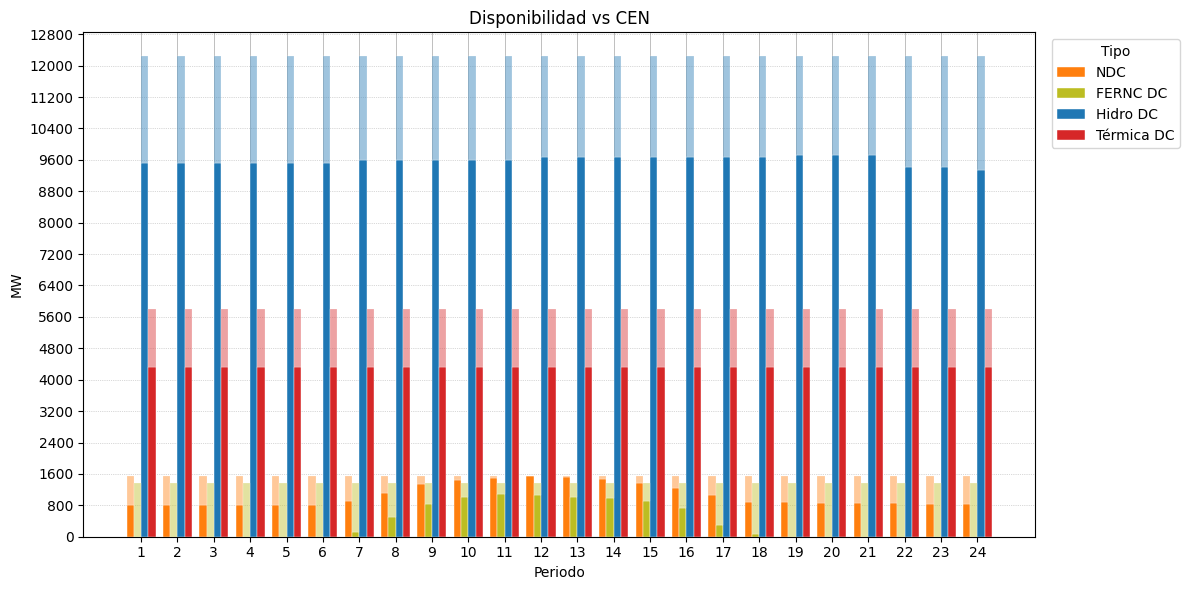

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

def lighten(color, amount=0.75):
    r,g,b = to_rgb(color)
    return (1-amount) + amount*np.array([r,g,b])

fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(1,25)
tipos = list(df_data_t['Tipo'])
n_tipos = max(1, len(tipos))
bar_width = 0.8 / n_tipos

color_map = {
    'NDC':        '#ff7f0e',
    'FERNC DC':   '#bcbd22',
    'Hidro DC':   '#1f77b4',
    'Térmica DC': '#d62728',
}
default_color = '#7f7f7f'

handles_tipos = []

for i, (_, row) in enumerate(df_data_t.iterrows()):
    tipo = str(row['Tipo'])
    c_dark  = color_map.get(tipo, default_color)
    c_light = lighten(c_dark, amount=0.85)

    # Valor por periodo (24)
    y_vals = np.asarray(row[l_per], dtype=float)

    # --- CEN por periodo (SIN dividir por 24) ---
    cen_raw = row['CEN']               # puede ser escalar (mismo valor cada periodo) o vector de 24
    if np.isscalar(cen_raw):
        y_cen = np.full(24, float(cen_raw))   # mismo CEN en todos los periodos
    else:
        y_cen = np.asarray(cen_raw, dtype=float)  # ya viene por periodo

    # Complemento (CEN - Valor)
    y_comp = y_cen - y_vals
    # Si NO quieres negativos apilando hacia abajo, descomenta la siguiente línea:
    # y_comp = np.clip(y_comp, 0, None)

    pos = x - 0.4 + i*bar_width + bar_width/2

    # Segmento base (oscuro)
    bars_dark = ax.bar(pos, y_vals, width=bar_width,
                       color=c_dark, edgecolor='white', linewidth=0.3, zorder=2)

    # Complemento (mismo color, más claro)
    ax.bar(pos, y_comp, width=bar_width, bottom=y_vals,
           color=c_light, edgecolor='white', linewidth=0.3, zorder=3, alpha=0.5)

    handles_tipos.append(bars_dark[0])

# Ajustar particiones en el eje Y
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=20))  # Máximo de 10 particiones

# Mostrar líneas de cuadrícula para particiones principales y menores
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)  # Líneas principales
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.5)  # Líneas menores

# Mostrar números en el eje Y
ax.tick_params(axis='y', which='both', labelsize=10)

ax.set_xlabel('Periodo'); ax.set_ylabel('MW')
ax.set_title('Disponibilidad vs CEN')
ax.set_xticks(x); ax.set_xticklabels(x)
ax.grid(axis='y', linestyle=':', alpha=0.6, zorder=1)

ax.legend(handles_tipos, [str(t) for t in tipos], title='Tipo',
          loc='upper left', bbox_to_anchor=(1.01, 1.0))
plt.tight_layout()
plt.show()



In [64]:
df_mpo

,item,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,Delta + MPO,350.58,340.58,340.58,340.58,340.58,350.58,340.58,340.58,306.58,...,350.58,350.58,390.58,390.58,395.58,853.7,500.58,390.58,350.58,350.58


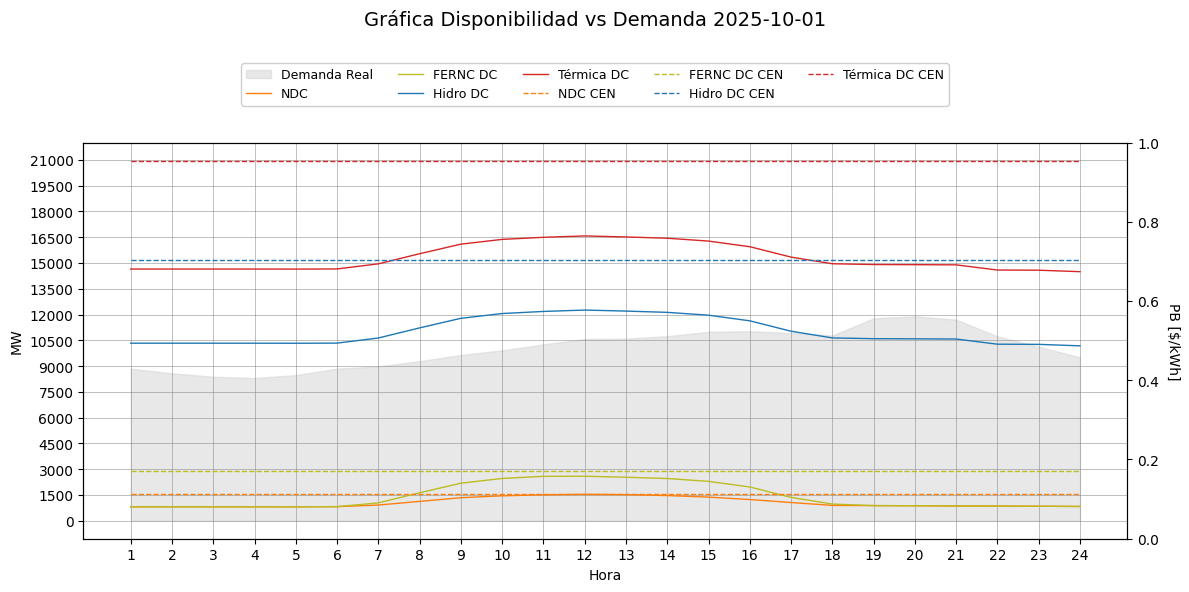

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Eje X (1..24)
x = np.arange(1, 25, dtype=float)

# --- Demanda real (eje izquierdo) ---
y_demreal = pd.to_numeric(df_dem.iloc[0, 0:24], errors='coerce').to_numpy(dtype=float)
if np.isnan(y_demreal).any():
    y_demreal = pd.Series(y_demreal).interpolate(limit_direction='both').to_numpy()

ax.fill_between(x, y_demreal, 0, color='lightgray', alpha=0.5, label='Demanda Real')

# Paleta por tipo (ajústala a tus nombres reales)
color_map = { 
    'NDC':       '#ff7f0e',  
    'FERNC DC':  '#bcbd22',  
    'Hidro DC':  '#1f77b4',  
    'Térmica DC':'#d62728', 
    # cualquier otro tipo...
}

default_color = '#7f7f7f'     # para tipos no mapeados

# --- Líneas apiladas (eje izquierdo) ---
y_stack = np.zeros_like(y_demreal, dtype=float)
for _, row in df_data.iterrows():
    tipo = str(row['Tipo'])
    y_values = pd.to_numeric(row.iloc[1:25], errors='coerce').to_numpy(dtype=float)
    if np.isnan(y_values).any():
        y_values = pd.Series(y_values).interpolate(limit_direction='both').to_numpy()
    ax.plot(
        x, y_stack + y_values,
        label=tipo,
        color=color_map.get(tipo, default_color),
        linewidth=1
    )
    y_stack += y_values

# --- Líneas apiladas (eje izquierdo) ---
y_stack = np.zeros_like(y_demreal, dtype=float)
for _, row in df_data_c.iterrows():
    tipo = str(row['Tipo'])
    y_values = row['CEN']
    ax.plot(
        x, y_stack + y_values,
        label=tipo + ' CEN',
        color=color_map.get(tipo, default_color),
        linewidth=1,
        linestyle='--'
    )
    y_stack += y_values

# --- Eje secundario con df_PB (1..24) ---
ax2 = ax.twinx()

if df_imar.shape[0]>0:

    # # Intento robusto para obtener las 24 horas de df_PB (primera fila)
    # candidatos = [
    #     df_mpo.iloc[0, 1:25],           # si hay 1 columna meta
    #     df_mpo.iloc[0, 2:26],           # si hay 2 columnas meta
    #     df_mpo.iloc[0, 0:24],           # si empiezan desde la columna 0
    #     df_mpo.filter(regex=r'^(?:[1-9]|1[0-9]|2[0-4])$').iloc[0]  # si las columnas se llaman "1".."24"
    # ]
    # y_pb = None
    # for s in candidatos:
    #     if s.shape[0] == 24:
    #         y_pb = pd.to_numeric(s, errors='coerce').to_numpy(dtype=float)
    #         break
    # if y_pb is None:
    #     raise ValueError("No se encontraron 24 columnas consecutivas (1..24) en df_PB para la primera fila.")

    # # Interpola si hay NaN
    # if np.isnan(y_pb).any():
    #     y_pb = pd.Series(y_pb).interpolate(limit_direction='both').to_numpy()

    y_pb   = pd.to_numeric(df_mpo.iloc[0,1:25], errors='coerce').to_numpy(dtype=float)

    # Trazo en eje secundario
    ax2.plot(x, y_pb, linewidth=1, linestyle='--',color='black', label='PB')

# --- Estética y leyenda combinada ---
ax.set_xlabel('Hora')
ax.set_ylabel('MW')
ax.grid(True)

# Ajustar particiones en el eje Y
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=20))  # Máximo de 10 particiones

# Mostrar líneas de cuadrícula para particiones principales y menores
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)  # Líneas principales
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.5)  # Líneas menores

# Mostrar números en el eje Y
ax.tick_params(axis='y', which='both', labelsize=10)

# --- LEYENDA CENTRADA DEBAJO DEL TÍTULO (sin montarse) ---

# --- Título y leyenda limpias ---

# 1) Quita título del eje si lo tenías:
# try: ax.set_title('')  # o simplemente no lo llames
# except: pass

# 2) Título a nivel de figura
fig.suptitle(rf'Gráfica Disponibilidad vs Demanda {FechaIni}', y=0.98, fontsize=14)

# 3) Reunir leyendas de ambos ejes
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles = h1 + h2
labels  = l1 + l2

# 4) Deja espacio superior y coloca la leyenda centrada
fig.subplots_adjust(top=0.80)  # juega entre 0.78–0.84
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.90),  # 0.88–0.92 según te guste
    ncol=min(5, len(labels)),
    frameon=True, fancybox=True, framealpha=0.95, fontsize=9
)

# 5) Eje Y derecho con etiqueta clara
ax2.set_ylabel('PB [$/kWh]', rotation=270, labelpad=15)

# Después de trazar todo, antes de plt.tight_layout()
ax.set_xticks(np.arange(1, 25))          # 1, 2, ..., 24
ax.set_xticklabels(np.arange(1, 25))     # (opcional si quieres asegurarlo)
ax.tick_params(axis='x', rotation=0)     # o 45 si se ven muy pegados

# 6) Que tight_layout respete el margen superior
plt.tight_layout(rect=[0, 0, 1, 0.85])

plt.show()